# harmonization
## Purpose: Use the aneris tool for harmonization
- Starting with historical (1750-2022) and projected (2020-2100) datasets for CH4
    - Historical dataset is product of PRIMAP, CEDS, GCP, & GFED
    - Projected datasets are outputs of GCAM 6.0 NGFS and MESSAGEix-GLOBIOM (will focus on one at a time)
- Credit: Gidden, M. (2017). gidden/aneris: Initial release version for harmonization paper (v0.1.0). Zenodo. https://doi.org/10.5281/ZENODO.802832


## Erica Simon, 01/31/24

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import aneris

%matplotlib inline

## Import datasets

In [38]:
GCAM_proj_emis = pd.read_csv('~/outputs/NGFS_GCAM_interp.csv')
MSG_proj_emis = pd.read_csv('~/outputs/NGFS_MSG_cleaned.csv')

hist_emis = pd.read_csv('~/outputs/hist_GCAM.csv')

## Visualize projected vs. historical CH4 emissions

This will help us to analyze the discrepancy between the two timeseries. Then, we can use the `aneris` harmonization tool to make these trajectories consistent with one another

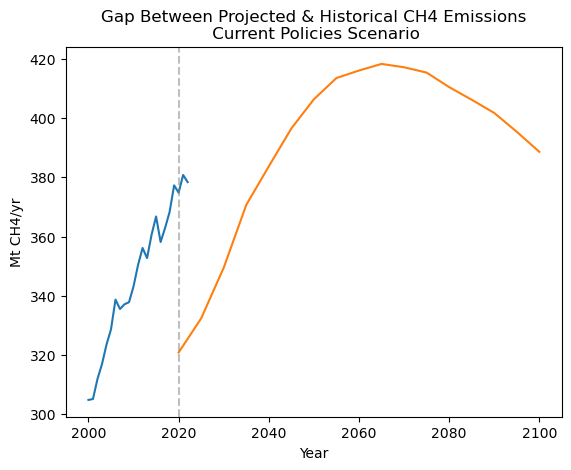

In [39]:
plt.plot(np.arange(2000, 2023), hist_emis.loc[hist_emis.Variable == 'Emissions|CH4'].values[0][255:])
plt.plot(np.arange(2020, 2101), GCAM_proj_emis.loc[GCAM_proj_emis.Variable == 'Emissions|CH4'].loc[GCAM_proj_emis.Scenario == 'Current Policies'].values[0][5:])
plt.axvline(2020, linestyle='--', color='grey', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Mt CH4/yr')
plt.title('Gap Between Projected & Historical CH4 Emissions\n Current Policies Scenario')
plt.show()

## aneris

In [40]:
GCAM_proj_emis.to_excel('~/outputs/GCAM.xlsx', sheet_name='data')

In [41]:
hist = hist_emis

hist.columns = hist.columns.astype(str)  # make sure they're all strings

regions = aneris.pd_read('regions_global_only.csv')


model, overrides, config = aneris.read_excel('~/outputs/GCAM.xlsx')

if "Unit" in overrides:
    overrides = overrides.drop(columns=["Unit"])

model.columns = model.columns.astype(str)  # make sure they're all strings
rc = aneris.RunControl('aneris_global_only.yaml')
rc.recursive_update("config", config)

In [45]:
overrides

,Model,Scenario,Region,Variable


In [42]:
rc

{'config': {'default_luc_method': 'reduce_ratio_2150_cov', 'default_ratio_method': 'reduce_ratio_2080', 'default_offset_method': 'reduce_offset_2080', 'cov_threshold': 20, 'harmonize_year': 2020, 'global_harmonization_only': True, 'replace_suffix': 'Harmonized-DB'}, 'prefix': 'prefix', 'suffix': 'suffix', 'add_5regions': False}

In [43]:
driver = aneris.cmip6.driver.HarmonizationDriver(
        rc, hist, model, overrides, regions)


In [44]:
for scenario in driver.scenarios():
        driver.harmonize(scenario)
harmonized, metadata, diagnostics = driver.harmonized_results()

INFO:root:Downselecting prefix|suffix variables


ValueError: No Variables found for harmonization. Searched for prefix|suffix.